##Proyecto Monte Carlo para las variaciones en la tasa de interés



In [ ]:
!pip install yahoo_fin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=d51a1693a206b68da3da0b21bcb08b87772a4739a92d09f897eab72e8f28915c
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=1f3b4314912b09a1dfc73cfe6791da64956eaf689f3799d8336807866dc30ea1
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found exist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yahoo_fin as yfin
import yahoo_fin.stock_info as si
from scipy.stats import norm
import statistics as st

##El modelo estocástico de Vasicek para la predicción de tipos de interés

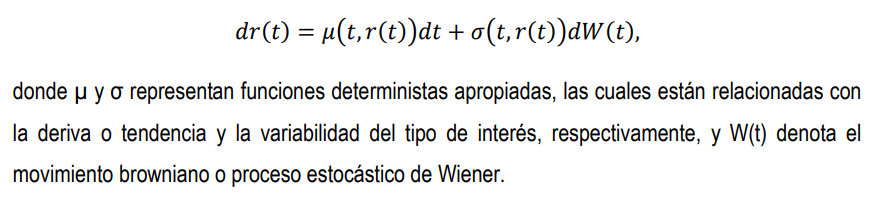

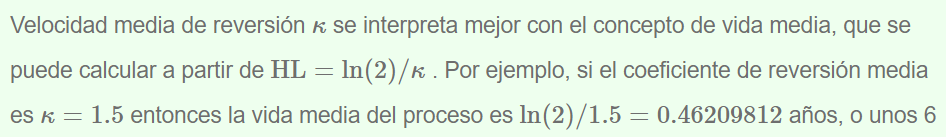

Para calcular a,b y varianza para la formula, se usaran los datos historicos de la tasa libre de riesgo aplizada en los CETES, desde: https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=24&accion=consultarCuadroAnalitico&idCuadro=CA240&locale=es&cuadroAnaliticoFechaCuadro=01/12/2022

Donde la varianza se saca mediante formula

la b se saca mediante la media geométrica de las tasas para llegar a un punto medio cercano al equilibrio

la a depende de la imagen de arriba donde el tiempo promedio en que las tasas se acercan a b se divide ln(2) sobre ese tiempo promedio

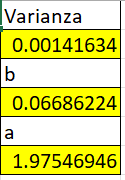

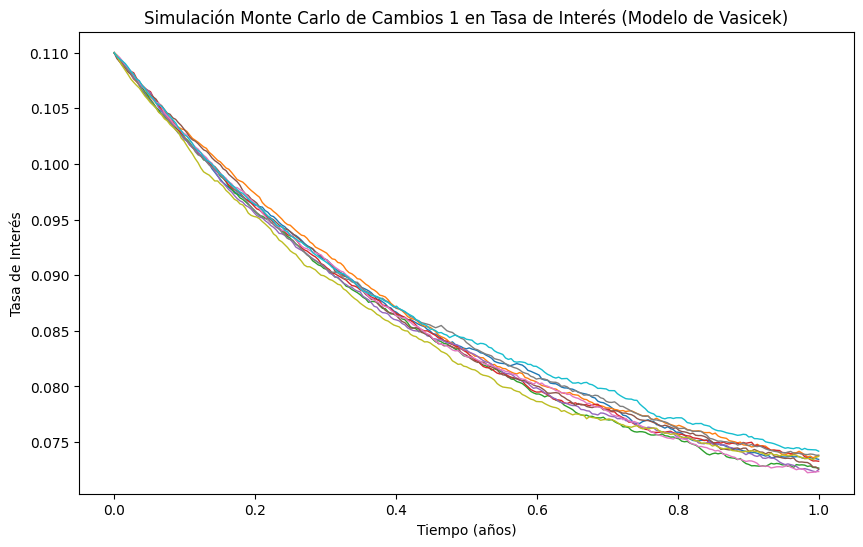

In [ ]:

# Parámetros del modelo de Vasicek
#Parámetro de velocidad de reversión.
#Es la rapidez con la que la tasa de interés converge hacia el nivel de equilibrio.
a = 1.97546946
#Nivel de equilibrio a largo plazo.
#Es el nivel al que la tasa de interés debería estabilizarse a largo plazo.
b = 0.06686224
#Volatilidad de la tasa de interés.
#La volatilidad representa la variabilidad aleatoria en la tasa de interés
sigma = 0.00141634
r0 = 0.11  # Tasa de interés inicial de los CETES a 23/11/2023
T = 1.0    # Horizonte de tiempo en años
num_simulaciones = 10000
#función definida por Chatgpt
# Función para simular cambios en la tasa de interés según el modelo de Vasicek
def simular_tasas_vasicek(a, b, sigma, r0, T, num_simulaciones):
    dt = T / 252  # Número de días de negociación en un año
    tasas_simuladas = np.zeros((num_simulaciones, int(T/dt)+1))

    for i in range(num_simulaciones):
        tasa_actual = r0
        for j in range(int(T/dt)+1):
            tasas_simuladas[i, j] = tasa_actual
            dW = np.random.normal(0, np.sqrt(dt))
            tasa_actual += a * (b - tasa_actual) * dt + sigma * dW

    return tasas_simuladas

# Realizar simulaciones
tasas_simuladas1 = simular_tasas_vasicek(a, b, sigma, r0, T, 10)
tasas_simuladas2 = simular_tasas_vasicek(a, b, sigma, r0, T, num_simulaciones)
# Graficar resultados 1
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, T + T/252, T/252), tasas_simuladas1.T, lw=1)
plt.title('Simulación Monte Carlo de Cambios 1 en Tasa de Interés (Modelo de Vasicek)')
plt.xlabel('Tiempo (años)')
plt.ylabel('Tasa de Interés')
plt.show()

In [ ]:
#convertimos el numpy.ndarray en una lista
tasas2 = [n for array in tasas_simuladas2 for n in array.flatten()]
#promediamos los precios de la opción call simulados
media=st.mean(tasas2)
std_deviation = np.std(tasas2)  # Desviación estándar
variance = np.var(tasas2)  # Varianza
data_range = np.ptp(tasas2)  # Rango

# Medidas de tendencia central

median = np.median(tasas2)  # Mediana
mode = st.mode(tasas2)  # Moda

print(media,std_deviation,variance,data_range,median,mode)

0.08564347700172986 0.01048105933025867 0.00010985260468440234 0.03991081742964413 0.08288324039946404 0.11


In [ ]:
#convertimos el numpy.ndarray en una lista
tasas2hull = [n for array in tasas_simuladas_hw2 for n in array.flatten()]
#promediamos los precios de la opción call simulados
mediah=st.mean(tasas2)
std_deviationh = np.std(tasas2)  # Desviación estándar
varianceh = np.var(tasas2)  # Varianza
data_rangeh = np.ptp(tasas2)  # Rango

# Medidas de tendencia central

medianh = np.median(tasas2)  # Mediana
modeh = st.mode(tasas2)  # Moda

print(mediah,std_deviationh,varianceh,data_rangeh,medianh,modeh)

0.08564347700172986 0.01048105933025867 0.00010985260468440234 0.03991081742964413 0.08288324039946404 0.11


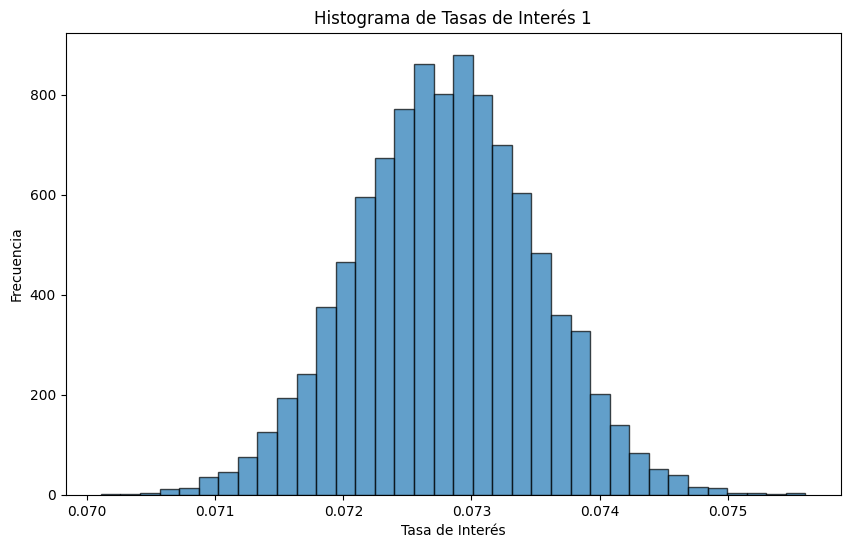

In [ ]:
# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(tasas_simuladas2[:, -1], bins=36, edgecolor='black', alpha=0.7)
plt.title('Histograma de Tasas de Interés 1')
plt.xlabel('Tasa de Interés')
plt.ylabel('Frecuencia')
plt.show()

##Modelo Hull-White
la que es una generalización de Vasicek con ahora un parámetro theta parecido a b pero en corto plazo que para terminos de la simulación Montecarlo lo tomaremos muy similar  y los demás siendo los mismos

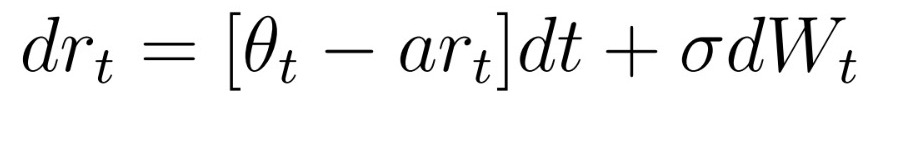

In [ ]:
#definimos la función para simular la tasa por el modelo hull-white (Chatgpt)
#theta: Función determinista de tiempo que representa la tendencia a corto plazo
def simular_tasas_hw(a, theta, sigma, r0, T, num_simulaciones, num_pasos):
    dt = T / num_pasos
    tasas_simuladas = np.zeros((num_simulaciones, num_pasos+1))

    for i in range(num_simulaciones):
        tasa_actual = r0
        for j in range(num_pasos+1):
            tasas_simuladas[i, j] = tasa_actual
            dW = np.random.normal(0, np.sqrt(dt))
            theta_t = theta[j]  # Puedes ajustar la función theta según tus necesidades
            tasa_actual += (theta_t - a * tasa_actual) * dt + sigma * dW

    return tasas_simuladas

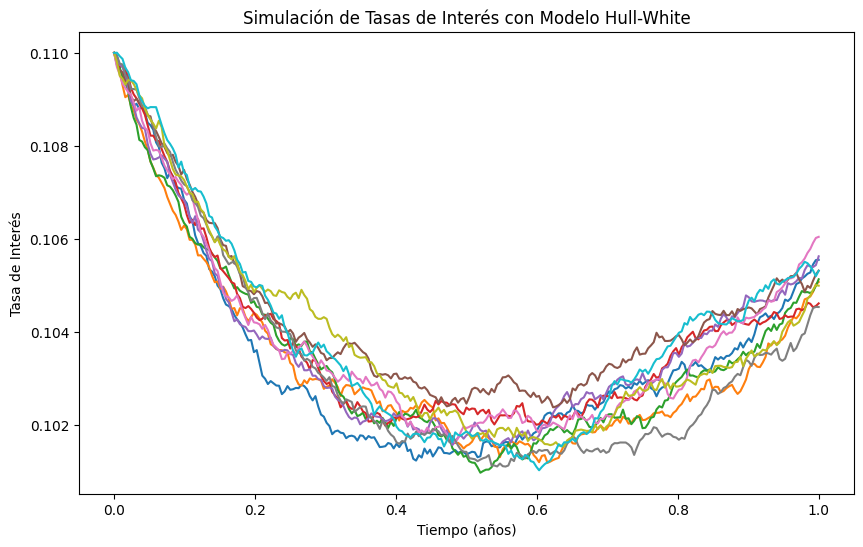

In [ ]:
# Parámetros del modelo Hull-White
num_pasos = 252
a_hw = 1.97546946
theta_hw = np.linspace(.18, .22, num_pasos+1)
sigma_hw = 0.00141634
r0_hw = 0.11  # Tasa de interés inicial de los CETES a 23/11/2023
T_hw = 1.0    # Horizonte de tiempo en años
num_simulaciones = 10
# Simulación Hull-White
tasas_simuladas_hw1 = simular_tasas_hw(a_hw, theta_hw, sigma_hw, r0_hw, T_hw, num_simulaciones, num_pasos)
tasas_simuladas_hw2 = simular_tasas_hw(a_hw, theta_hw, sigma_hw, r0_hw, T_hw, 10000, num_pasos)
# Gráfico de las trayectorias simuladas
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T_hw, num_pasos+1), tasas_simuladas_hw1.T)
plt.title('Simulación de Tasas de Interés con Modelo Hull-White')
plt.xlabel('Tiempo (años)')
plt.ylabel('Tasa de Interés')
plt.show()

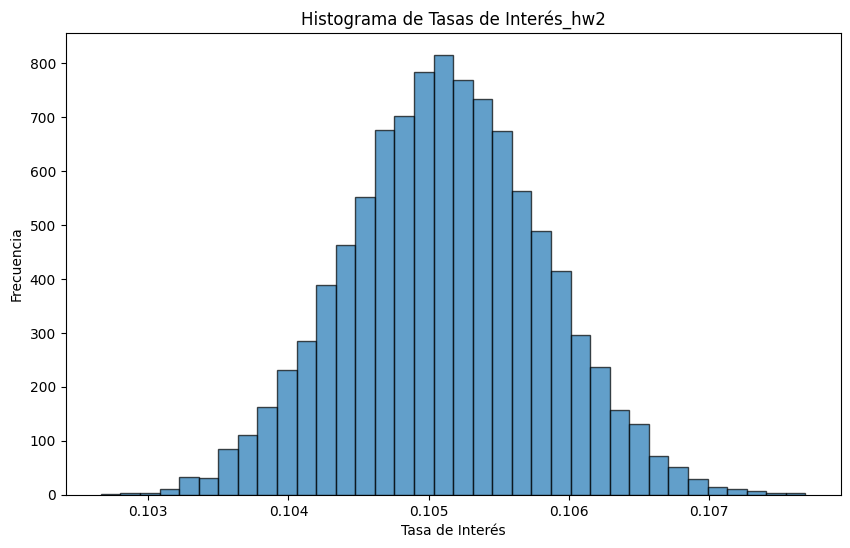

In [ ]:
# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(tasas_simuladas_hw2[:, -1], bins=36, edgecolor='black', alpha=0.7)
plt.title('Histograma de Tasas de Interés_hw2')
plt.xlabel('Tasa de Interés')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
petroleo = si.get_data("CL=F")
petroleo = petroleo.drop(columns = "ticker")
petroleo

,open,high,low,close,adjclose,volume
2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0
2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0
2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0
2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0
2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0
...,...,...,...,...,...,...
2023-11-17,72.970001,75.989998,72.750000,75.889999,75.889999,101484.0
2023-11-20,75.650002,78.220001,75.650002,77.599998,77.599998,270638.0
2023-11-21,77.650002,77.919998,76.919998,77.769997,77.769997,238629.0
2023-11-22,77.769997,77.970001,73.790001,77.099998,77.099998,389325.0


In [ ]:
#Sacamos el logaritmo de los precios de cierre para sacar la varianza
logaritmo = np.log(petroleo["adjclose"])
logaritmo

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


2000-08-23    3.467297
2000-08-24    3.454106
2000-08-25    3.467297
2000-08-28    3.492560
2000-08-29    3.487987
                ...   
2023-11-17    4.329285
2023-11-20    4.351567
2023-11-21    4.353756
2023-11-22    4.345103
2023-11-24    4.324662
Name: adjclose, Length: 5916, dtype: float64

In [ ]:
# Obetenemos la varianza de los logaritmos de los daros históricos recabados del petróleo
varianza = np.var(logaritmo)
varianza

0.1935029240092248

In [ ]:
# Parámetros del modelo de Black-Scholes
S = 800            # Precio del activo
K = 1000           # Precio del ejercicio
R = 0.01           # Tasa de interés libre de riesgo
T = 0.75           # Tiempo en años de lo que falta para la fecha de vencimiento
v = 0.089985165    # volatilidad elevada al cuadrado (varianza)
# Función para simular cambios en la tasa de interés según el modelo de Black-Scholes
def BlackScholes(S, K, R, T, v):
    d1 = (np.log(S/K)+(R+(v/2))*T)/(np.sqrt(v*T))
    d2 = (np.log(S/K)+(R-(v/2))*T)/(np.sqrt(v*T))
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    call = S*Nd1-K*np.exp(-R*T)*Nd2
    return call


In [ ]:
#BlackScholes(800,1000,0.01,0.75,0.089985165)

##Precio de la opción con Simulaciones Monte-Carlo por el modelo vasicek

In [ ]:
#sacamos el precio de las opciones a través de la simulación Monte Carlo y la función B-S
opciones = BlackScholes(76.37, 78, tasas_simuladas2,1,varianza)

In [ ]:
type(opciones)

numpy.ndarray

In [ ]:
#convertimos el numpy.ndarray en una lista
lista_de_valores = [n for array in opciones for n in array.flatten()]
#promediamos los precios de la opción call simulados
st.mean(lista_de_valores)


15.403353311084787

##Precio de la opción con Simulaciones MOnte-Carlo por modelo Hull-White


In [ ]:
#sacamos el precio de las opciones a través de la simulación Monte Carlo y la función B-S
opciones_hw = BlackScholes(76.37, 78, tasas_simuladas_hw2,1,varianza)

In [ ]:
#convertimos el numpy.ndarray en una lista
lista_de_valores_hw = [n for array in opciones_hw for n in array.flatten()]
#promediamos los precios de la opción call simulados
st.mean(lista_de_valores_hw)

16.014458456167056